In [17]:
# Importing Packages
import matplotlib.pyplot as plt
import numpy as np
import random

In [18]:
# Creating expected reward function
def random_customer(avail_seat):
    '''
    This function will generate a random number of customer who will buy 
    the flight ticket in one day. The number is limited by the availibility
    of the seats.

    Args:
    None

    Return:
    random_cust (int) -> number of customer that day

    '''
    random_cust = random.randint(1, avail_seat)

    return random_cust

In [19]:
def set_policy(avail_seat, time_of_day):
    '''
    Function to chose a proposed policy made by the company's manager
    
    Rule to choose policy:
    1. if the avail_seat > 5, choose policy 3
    2. if the 1 <= avail_seat <= 5 and time_of_day <= 9, choose policy 2
    3. if the 1 <= avail_seat <= 5 and time_of_day >= 10, choose policy 1
    4. if avail_seat = 0, choose policy 0

    Policy description:
    Policy 3: sell to Type 1, Type 2, and Type 3 customers
    Policy 2: sell to Type 1 and Type 2 customers
    Policy 1: sell to Type 1 customers
    Policy 0: cannot sell to anybody

    Args:
    avail_seat (int) -> total remaining available seats
    time_of_day (int) -> days since the tickets are available

    Return:
    policy (int) -> chosen policy
    '''

    if avail_seat > 5:
        policy = 3
    elif (1 <= avail_seat <= 5) and (time_of_day <= 9):
        policy = 2
    elif (1 <= avail_seat <= 5) and (time_of_day >= 10):
        policy = 1
    else:
        policy = 0

    return policy

In [20]:
def exp_reward_matrix(remain_seat, remain_day):
    '''
    Function to calculate the expected reward matrix

    Args:
    remain_seat (int) -> total remaining available seats
    remain_day (int) -> total remaining days until the flight

    Return:
    total_reward (float) -> total expected reward
    '''

    reward_matrix = np.zeros((11,26))

    for seat in range(1,11):
        for day in range(1,26):
            policy = set_policy(seat, day)
            if policy == 1:
                reward_matrix[seat,day] = 0.4 * (3000 + reward_matrix[seat-1, day-1]) + 0.3 * (reward_matrix[seat, day-1]) \
                    + 0.3 * (reward_matrix[seat, day-1])
            elif policy == 2:
                reward_matrix[seat,day] = 0.4 * (3000 + reward_matrix[seat-1, day-1]) + 0.3 * (2000 + reward_matrix[seat-1, day-1]) \
                    + 0.3 * (reward_matrix[seat, day-1])
            else:
                reward_matrix[seat,day] = 0.4 * (3000 + reward_matrix[seat-1, day-1]) + 0.3 * (2000 + reward_matrix[seat-1, day-1]) \
                    + 0.3 * (1000 + reward_matrix[seat-1, day-1])
    
    return reward_matrix[remain_seat, remain_day]

In [31]:
def total_exp_reward(remain_seat, remain_day):
    '''
    Function to calculate total expected reward for one simulation.
    This one simulation shows the total expected reward that will be obtained in a period of 25 days if a random number of customers buy tickets every day.

    Args:
    remain_seat (int) -> total remaining available seats
    remain_day (int) -> total remaining days until the flight

    Return:
    total_reward (float) -> total reward achieved at the end of selling period
    '''
    reward = []
    for day in range(remain_day,0,-1):
        if remain_seat > 0:
            # expected reward before customers buy any tickets this day
            current_exp_reward_init = exp_reward_matrix(remain_seat,day)

            # remain seat after random customer buy seat this day
            num_cust_today = random_customer(remain_seat)
            remain_seat = remain_seat - num_cust_today

            # expected reward after customers buy any tickets this day
            current_exp_reward_after = exp_reward_matrix(remain_seat, day)

            expected_reward = current_exp_reward_init - current_exp_reward_after
            reward.append(expected_reward)
            
    total_reward = sum(reward)
    return total_reward

In [32]:
def monte_carlo_sim(num_simulations):
    '''
    Function to simulate Monte Carlo simulation, plot the result, and calculate the mean and standard deviaton of expected reward

    Args:
    num_simulation (int) -> number of simulation conducted

    Return:
    avg_exp_reward (float) -> the average of expected reward from Monte Carlo simulation results
    sd_exp_reward (float) -> the standard deviation of expected reward from Monte Carlo simulation results
    '''

    remain_seat = 10
    remain_day = 25

    sim_ax = [] # x axis for the plot, total simulation
    reward_ax = [] # y axis for the plot, total reward each simulation

    for sim in range(0,num_simulations):
        rewards = total_exp_reward(remain_seat,remain_day)
        reward_ax.append(rewards)
        sim_ax.append(sim)

    fig = plt.figure()
    plt.title("Monte Carlo Flight Ticket [" + str(num_simulations) + " simulations]")
    plt.xlabel("Simulation")
    plt.ylabel("Expected reward [$]")
    plt.xlim([0, num_simulations])
    plt.plot(sim_ax, reward_ax)

    avg_exp_reward = np.average(reward_ax)
    sd_exp_reward = np.std(reward_ax)

    return avg_exp_reward, sd_exp_reward

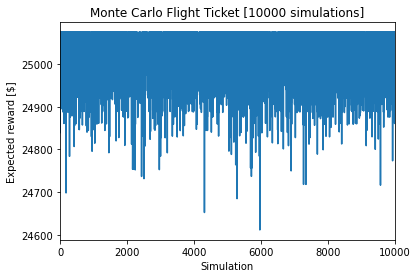

In [33]:
sim_result = monte_carlo_sim(10000)

In [35]:
print('Mean of expected reward is', sim_result[0])
print('Standard deviation of expected reward is', sim_result[1])

Mean of expected reward is 25028.39325376835
Standard deviation of expected reward is 54.283166980658315
